In [ ]:
import numpy as np  # Importing the NumPy library for numerical operations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting and visualizations
import pandas as pd  # Importing Pandas for data manipulation and analysis
import seaborn as sns  # Importing Seaborn for statistical data visualization

# Reading the dataset from a TSV (Tab-Separated Values) file
# 'Restaurant_Reviews.tsv' is the filename
# delimiter='\t' specifies that the file is tab-separated
# quoting=3 indicates that we ignore double quotes in the file
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

# Display the first few rows of the dataset to get an initial view of the data
dataset.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
len(dataset)

1000

In [ ]:
dataset.isnull().sum()

,0
Review,0
Liked,0


In [ ]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(dataset.describe())


Summary Statistics:
            Liked
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000


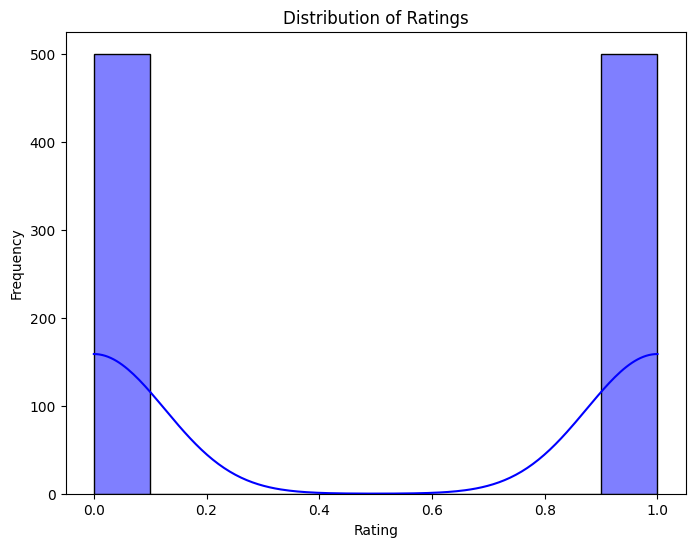

In [ ]:
# Plotting the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Liked'], bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Analysis of average rating per review length
# Adding a new column for review length
dataset['Review_Length'] = dataset['Review'].apply(len)

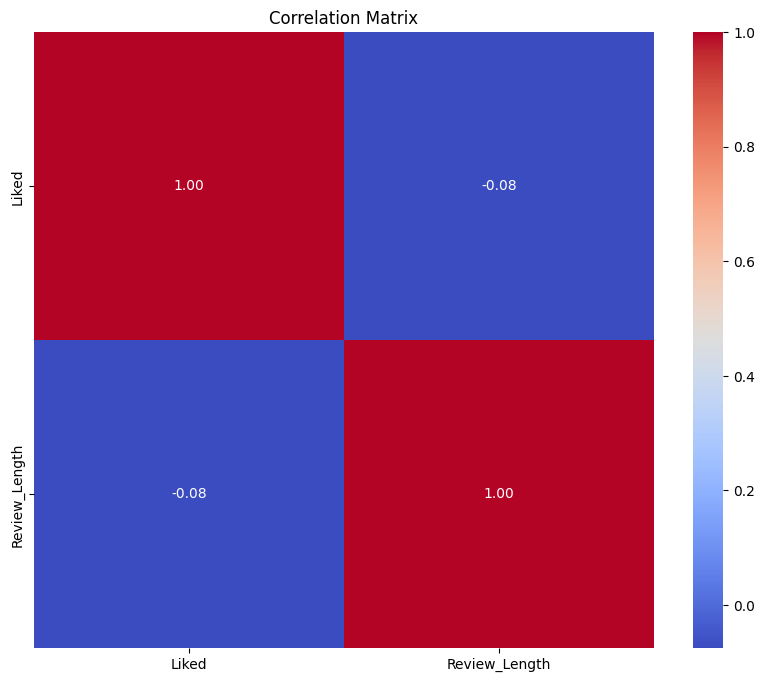

In [ ]:
# Correlation matrix heatmap
# First, select only numeric columns for correlation analysis
numeric_columns = dataset.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Cleaning the texts
import re  # Importing the regular expressions library for text processing
import nltk  # Importing the Natural Language Toolkit for text processing
nltk.download('stopwords')  # Downloading the stopwords from NLTK corpus

from nltk.stem.porter import PorterStemmer  # Importing the Porter Stemmer for stemming words
from nltk.corpus import stopwords  # Importing the stopwords from NLTK corpus

corpus = []  # Initializing an empty list to store the cleaned reviews

# Loop through each review in the dataset
for i in range(0, 1000):
    # Remove all characters except letters (a-z, A-Z) from the review text
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])

    # Convert the review text to lowercase
    review = review.lower()

    # Split the review text into individual words
    review = review.split()

    # Create an instance of the PorterStemmer
    ps = PorterStemmer()

    # Stem each word in the review and remove stopwords
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

    # Join the cleaned and stemmed words back into a single string
    review = ' '.join(review)

    # Append the cleaned review to the corpus
    corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
review


'wast enough life pour salt wound draw time took bring check'

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

,count
Liked,
1,500
0,500


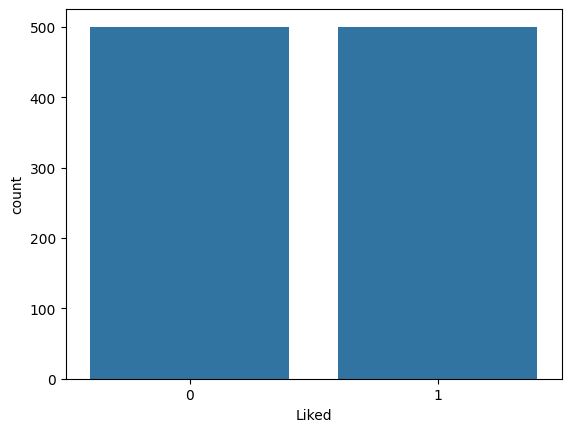

In [ ]:
sns.countplot(x = "Liked", data = dataset)
dataset["Liked"].value_counts()

# Support Vector Classifier

In [ ]:
#Support Vector Classifier

from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77        97
           1       0.89      0.55      0.68       103

    accuracy                           0.73       200
   macro avg       0.78      0.74      0.73       200
weighted avg       0.78      0.73      0.73       200



In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[90  7]
 [46 57]]


[[90  7]
 [46 57]]


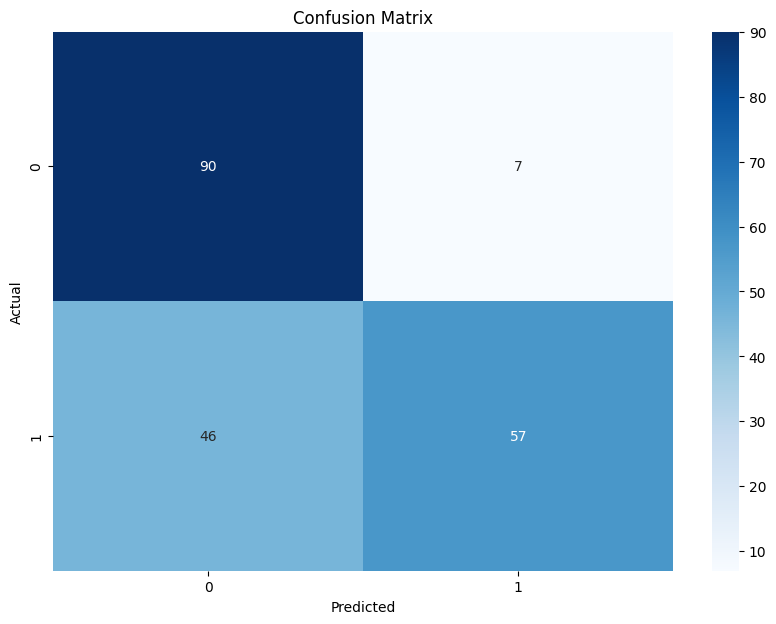

In [ ]:
# Importing necessary libraries for creating a confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_pred is defined elsewhere in your code as the predicted labels from your model
# For example, y_pred = model.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)  # Printing the confusion matrix to the console

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))  # Setting the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Creating a heatmap with annotations
plt.xlabel('Predicted')  # Labeling the x-axis as 'Predicted'
plt.ylabel('Actual')  # Labeling the y-axis as 'Actual'
plt.title('Confusion Matrix')  # Adding a title to the plot
plt.show()  # Displaying the plot


In [ ]:
# Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Creating and training the Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Making predictions with the trained classifier
y_pred = classifier.predict(X_test)

# Importing necessary libraries for creating a confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75        97
           1       0.84      0.54      0.66       103

    accuracy                           0.71       200
   macro avg       0.74      0.72      0.70       200
weighted avg       0.74      0.71      0.70       200



              precision    recall  f1-score   support

           0       0.65      0.89      0.75        97
           1       0.84      0.54      0.66       103

    accuracy                           0.71       200
   macro avg       0.74      0.72      0.70       200
weighted avg       0.74      0.71      0.70       200

[[86 11]
 [47 56]]


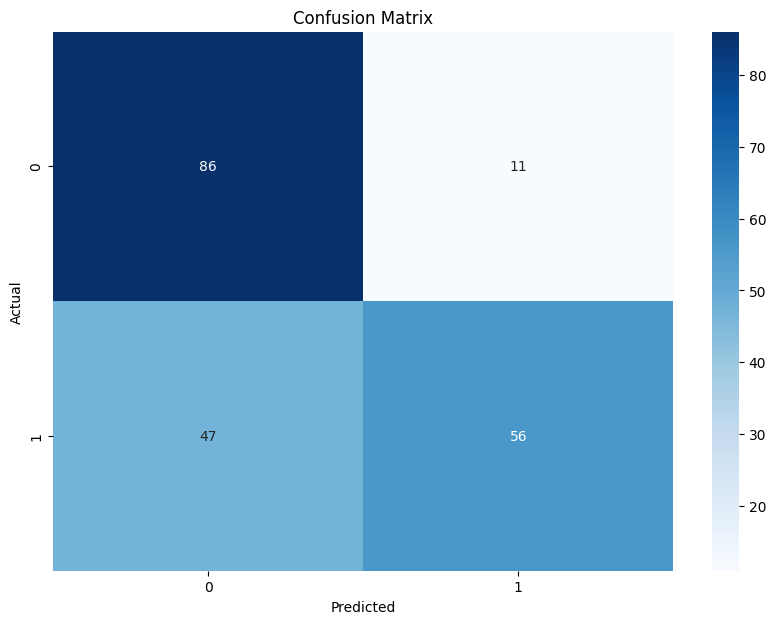

In [ ]:


# Printing the classification report
print(classification_report(y_test, y_pred))

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)  # Printing the confusion matrix to the console

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))  # Setting the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Creating a heatmap with annotations
plt.xlabel('Predicted')  # Labeling the x-axis as 'Predicted'
plt.ylabel('Actual')  # Labeling the y-axis as 'Actual'
plt.title('Confusion Matrix')  # Adding a title to the plot
plt.show()  # Displaying the plot


In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

0.735


# GaussianNB Classifier

In [ ]:
#GaussianNB Classifier

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55 42]
 [12 91]]


In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

0.73


# KNeighbors Classifier

In [ ]:
#KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.72      0.63        97
           1       0.64      0.46      0.53       103

    accuracy                           0.58       200
   macro avg       0.60      0.59      0.58       200
weighted avg       0.60      0.58      0.58       200



In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[70 27]
 [56 47]]


In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

0.585


# MultinomialNb Classifer

In [ ]:
#MultinomialNB Classifier

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        97
           1       0.76      0.79      0.78       103

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[72 25]
 [22 81]]


In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

0.765


# Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72        97
           1       0.76      0.64      0.69       103

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200



In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[76 21]
 [37 66]]


In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

0.71


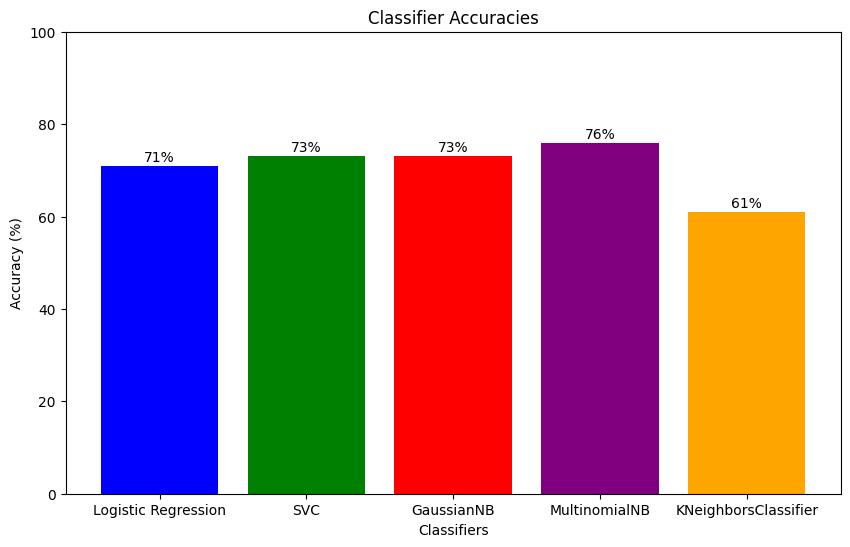

In [ ]:
import matplotlib.pyplot as plt

# Results of different classifiers
classifiers = ['Logistic Regression', 'SVC', 'GaussianNB', 'MultinomialNB', 'KNeighborsClassifier']
accuracies = [71, 73, 73, 76, 61]  # Accuracy percentages

# Creating the bar plot
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])  # Creating bars with different colors

# Adding title and labels
plt.title('Classifier Accuracies')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')

# Adding accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 1, f'{accuracy}%', ha='center')

# Display the plot
plt.ylim(0, 100)  # Setting the y-axis limit from 0 to 100
plt.show()
